### 0. 설정

In [ ]:
import sys

assert sys.version_info >= (3, 7)

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

import sys
# 코랩의 경우 나눔 폰트를 설치합니다.
if 'google.colab' in sys.modules:
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

# 나눔 폰트를 사용합니다.
import matplotlib

matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### 1. k-means 알고리즘

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# 1. 데이터 로드 및 전처리
df = pd.read_csv('/content/drive/MyDrive/최종_법정동별 데이터.csv', encoding='cp949')
print(df.head())

  gu_name dong_name  population  subway_count  criminal_count  police_count
0     종로구       가락동        2273             0            2981             3
1     종로구      가리봉동        1292             0            2981             3
2     종로구       가산동         199             0            2981             1
3     종로구       가양동         553             0            2981             0
4     종로구       가회동         396             0            2981             0


In [ ]:
#문자형 제거
df_dropped = df.drop(columns=['gu_name','dong_name'])
print(df_dropped)

     population  subway_count  criminal_count  police_count
0          2273             0            2981             3
1          1292             0            2981             3
2           199             0            2981             1
3           553             0            2981             0
4           396             0            2981             0
..          ...           ...             ...           ...
450       26066             3            3398             0
451       65007             2            3398             1
452       65113             1            3398             1
453       85829             3            3398             2
454       34673             0            3398             0

[455 rows x 4 columns]


In [ ]:
# 데이터 표준화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_dropped)

In [ ]:
# 2. 적절한 k 값 찾기 (실루엣 점수 사용)
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_values = range(2, 11)  # k=2부터 10까지 테스트

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, clusters)
    silhouette_scores.append(score)

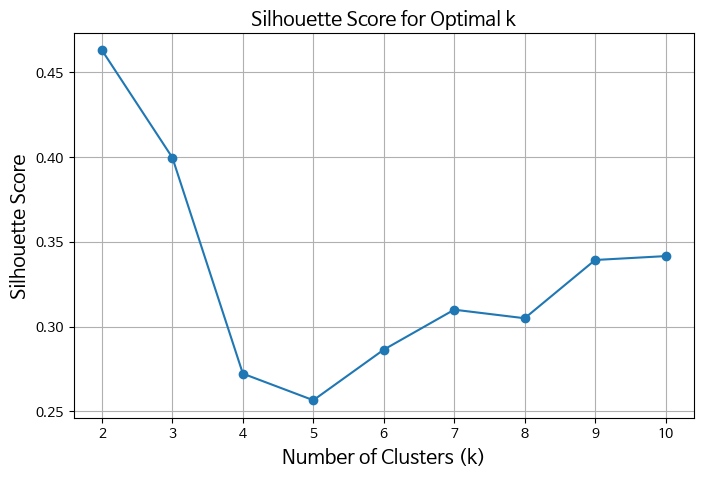

In [ ]:
# 실루엣 점수 시각화
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [ ]:
# 3. k-means 클러스터링 (k=3으로 가정)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

In [ ]:
# 결과를 데이터프레임에 추가
df_group = pd.DataFrame(df)
df_group['Cluster'] = clusters

print(df_group.head())

  gu_name dong_name  population  subway_count  criminal_count  police_count  \
0     종로구       가락동        2273             0            2981             3   
1     종로구      가리봉동        1292             0            2981             3   
2     종로구       가산동         199             0            2981             1   
3     종로구       가양동         553             0            2981             0   
4     종로구       가회동         396             0            2981             0   

   Cluster  
0        0  
1        0  
2        2  
3        2  
4        2  


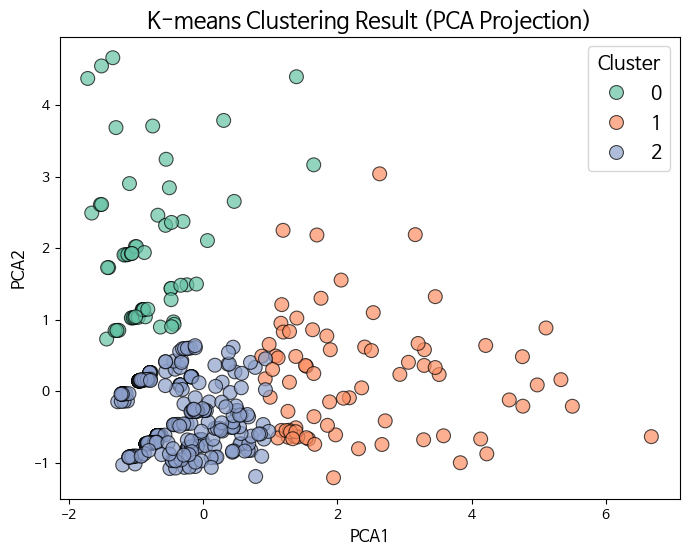

In [ ]:
# 4-1. 결과 시각화 (2차원 PCA로 변환 후 시각화)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# k-means 클러스터링 (k=3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# 데이터 차원 축소 (PCA 사용하여 2D로 투영)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

# PCA 결과를 데이터프레임에 추가
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]
df['Cluster'] = clusters

# 클러스터별로 색상 지정하여 산점도 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set2', data=df, s=100, alpha=0.7, edgecolor='k')

# 그래프 제목과 레이블 설정
plt.title('K-means Clustering Result (PCA Projection)', fontsize=16)
plt.xlabel('PCA1', fontsize=12)
plt.ylabel('PCA2', fontsize=12)

# 그래프 표시
plt.legend(title='Cluster')
plt.show()

In [ ]:
#주성분 로딩값 출력

# PCA 모델 학습 후 각 주성분에 대한 설명력과 로딩 확인
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

# 설명력 (각 주성분이 설명하는 분산 비율)
explained_variance = pca.explained_variance_ratio_

# 주성분 로딩 (각 특성에 대한 기여도)
loadings = pca.components_

# 결과 출력
print("Explained Variance Ratio for PC1 and PC2:")
print(explained_variance)

print("\nPCA Components (Loadings):")
print(loadings)

Explained Variance Ratio for PC1 and PC2:
[0.42519721 0.25215843]

PCA Components (Loadings):
[[ 0.61863942  0.64935307  0.42570217 -0.12001467]
 [ 0.04523242 -0.06027765  0.29476934  0.95259208]]


In [ ]:
#그룹별 평균 주성분 점수 출력

import pandas as pd
import numpy as np

# PCA 변환된 데이터에서 각 클러스터 그룹의 평균 주성분 점수 계산
# PCA 점수는 df['PCA1']와 df['PCA2']에 저장되어 있음

# 클러스터별 평균 PCA 점수
cluster_means = df.groupby('Cluster')[['PCA1', 'PCA2']].mean()

print("각 그룹별 평균 주성분 점수:")
print(cluster_means)

각 그룹별 평균 주성분 점수:
             PCA1      PCA2
Cluster                    
0       -0.795690  1.958472
1        2.351459  0.175065
2       -0.421601 -0.397098


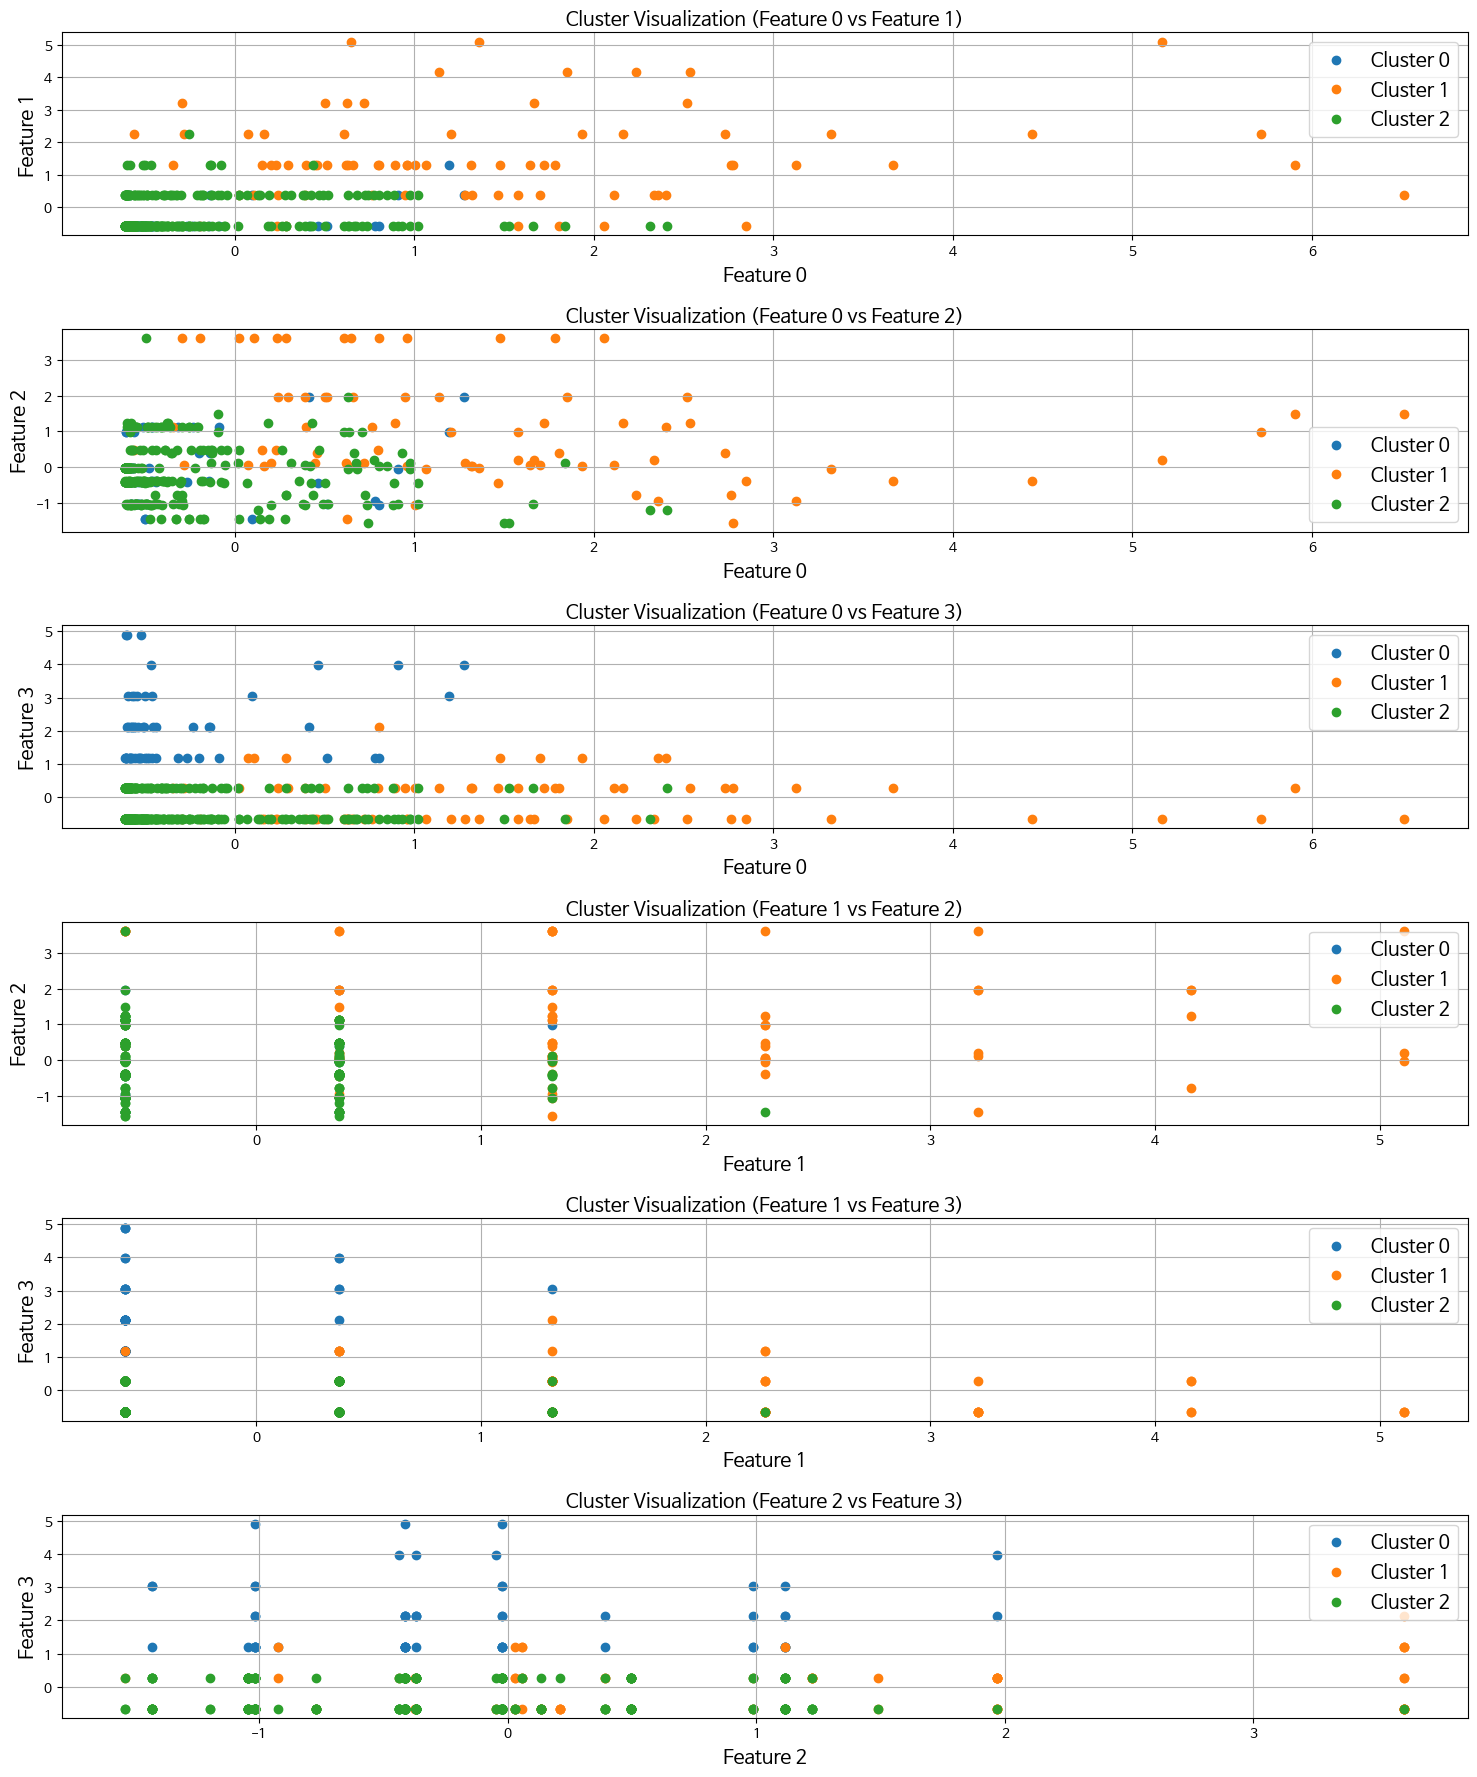

In [ ]:
#4-2. 모든 변수 조합으로 시각화

import itertools
import matplotlib.pyplot as plt

# 모든 변수 조합 생성
variable_indices = range(data_scaled.shape[1])  # 데이터 열 인덱스
combinations = list(itertools.combinations(variable_indices, 2))

# 그래프 생성
plt.figure(figsize=(15, len(combinations) * 3))
for i, (idx1, idx2) in enumerate(combinations, start=1):
    plt.subplot(len(combinations), 1, i)
    for cluster in range(k):
        plt.scatter(
            data_scaled[clusters == cluster, idx1],
            data_scaled[clusters == cluster, idx2],
            label=f'Cluster {cluster}'
        )
    plt.title(f'Cluster Visualization (Feature {idx1} vs Feature {idx2})')
    plt.xlabel(f'Feature {idx1}')
    plt.ylabel(f'Feature {idx2}')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

### 2. 가우시안 혼합 모델(GMM)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
# 1. 데이터 로드 및 전처리
df = pd.read_csv('/content/drive/MyDrive/최종_법정동별 데이터.csv', encoding='cp949')
print(df.head())

#문자형 제거
df_dropped = df.drop(columns=['gu_name','dong_name'])
print(df_dropped)

# 데이터 표준화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_dropped)

  gu_name dong_name  population  subway_count  criminal_count  police_count
0     종로구       가락동        2273             0            2981             3
1     종로구      가리봉동        1292             0            2981             3
2     종로구       가산동         199             0            2981             1
3     종로구       가양동         553             0            2981             0
4     종로구       가회동         396             0            2981             0
     population  subway_count  criminal_count  police_count
0          2273             0            2981             3
1          1292             0            2981             3
2           199             0            2981             1
3           553             0            2981             0
4           396             0            2981             0
..          ...           ...             ...           ...
450       26066             3            3398             0
451       65007             2            3398             1
452 

In [ ]:
# 2. 가우시안 혼합모델 (Gaussian Mixture Model)로 클러스터링
k = 3
gmm = GaussianMixture(n_components=k, random_state=42)
gmm_clusters = gmm.fit_predict(data_scaled)

# 결과를 데이터프레임에 추가
gmm_df = pd.DataFrame(df)
gmm_df['Cluster'] = gmm_clusters

print(gmm_df.head())

  gu_name dong_name  population  subway_count  criminal_count  police_count  \
0     종로구       가락동        2273             0            2981             3   
1     종로구      가리봉동        1292             0            2981             3   
2     종로구       가산동         199             0            2981             1   
3     종로구       가양동         553             0            2981             0   
4     종로구       가회동         396             0            2981             0   

   Cluster  
0        0  
1        0  
2        0  
3        0  
4        0  


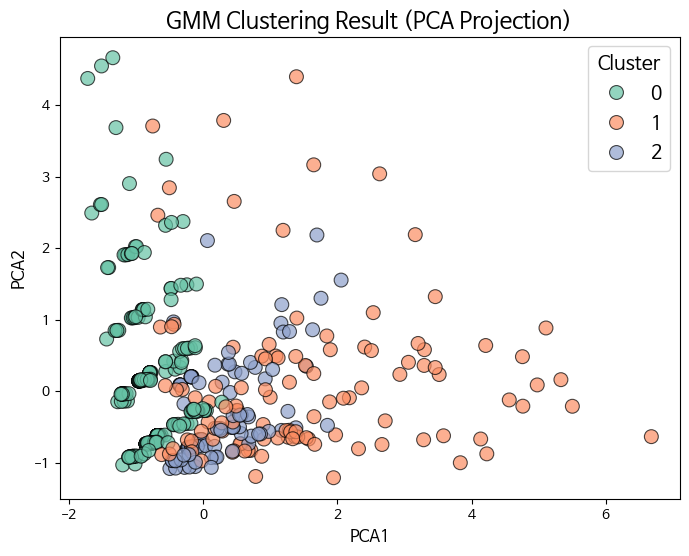

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# 데이터 차원 축소 (PCA 사용하여 2D로 투영)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

# PCA 결과를 데이터프레임에 추가
gmm_df['PCA1'] = pca_components[:, 0]
gmm_df['PCA2'] = pca_components[:, 1]

# 클러스터별로 색상 지정하여 산점도 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set2', data=gmm_df, s=100, alpha=0.7, edgecolor='k')

# 그래프 제목과 레이블 설정
plt.title('GMM Clustering Result (PCA Projection)', fontsize=16)
plt.xlabel('PCA1', fontsize=12)
plt.ylabel('PCA2', fontsize=12)

# 그래프 표시
plt.legend(title='Cluster')
plt.show()